# Build a classifier to determine whether a news article is fake or real

You are a new an AI Engineer, task with building an AI/ML classifier that helps politicians determine whether news articles trending on social media are fake or real.

Follow an approach similar to what we took in class, which looks something like the below.

- Preprocess the data
    - Remove stop words
    - Remove unwanted characters
    - Stemining
    - ...
- Split data between training and test sets
- Modeling strategies
    - Bag of words modeling including TF-IDF using traditional ML
    - LST modeling
    - Transformer modeling
    
Recommend the best model based on relevant metrics of your choice. Be sure to explain your rational, including relevant visualizations at every steps of your work

Minimal starter code has been provided below     

In [2]:
import pandas as pd

# Load the  Data

In [3]:
Fake=pd.read_csv("./Fake.csv")
true=pd.read_csv("./True.csv")

- Give the fake news label 0 :

In [4]:
Fake['label']=0

In [5]:
Fake

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


- Give the true news label 1 :

In [6]:
true['label']=1

In [7]:
true

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


- Delete unneeded columns

In [8]:
Fake.drop(columns=["title","date","subject"],inplace=True)
true.drop(columns=["title","date","subject"],inplace=True)

In [9]:
Fake.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [10]:
true.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


- Add the two data frame in one datarame

In [11]:
News=pd.concat([Fake,true],ignore_index=True)
News

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,1


- Check for cleaning data

In [12]:
News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


In [13]:
News.isnull().sum()

text     0
label    0
dtype: int64

In [14]:
News.duplicated().sum()

6251

In [15]:
News.drop_duplicates(inplace=True)
News.duplicated().sum()

0

In [16]:
total_false = len(News[News['label'] == 0])
total_true = len(News[News['label'] == 1])
print(total_false)
print(total_true)

17455
21192


### Preprocess the data

### Remove Stopwords

In [17]:
!pip install --quiet spacy

In [18]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define a function to preprocess text
def preprocess_text(text):
    # Remove unwanted characters
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip().lower()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords and punctuation, and lemmatize
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and token not in string.punctuation]

    return ' '.join(filtered_tokens)


News['text'] = News['text'].apply(preprocess_text)

In [20]:
print(News.head())

                                                text  label
0  donald trump wish american happy new year leav...      0
1  house intelligence committee chairman devin nu...      0
2  friday revealed former milwaukee sheriff david...      0
3  christmas day donald trump announced would bac...      0
4  pope francis used annual christmas day message...      0


# Split data

In [21]:
from sklearn.model_selection import train_test_split

X = News['text']
y = News['label']

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30917,)
(7730,)
(30917,)
(7730,)


In [23]:
print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())

37684    sydney reuters ninth australian lawmaker quit ...
41071    hanoi reuters least people died went missing d...
33108    washington reuters president barack obama meet...
43531    brasilia reuters u president donald trump invi...
2269     donald trump ruined remaining chance get suppo...
Name: text, dtype: object
37684    1
41071    1
33108    1
43531    1
2269     0
Name: label, dtype: int64
42133    september corrected fix date election paragrap...
29371    reuters u president donald trump said friday a...
44520    pristina reuters kosovo center right coalition...
27618    washington reuters president donald trump frid...
4156     pennsylvania man apparently failed basic biolo...
Name: text, dtype: object
42133    1
29371    1
44520    1
27618    1
4156     0
Name: label, dtype: int64


# Modeling Strategies

## Bag of words modeling including TF-IDF using traditional ML

Bag of Words Model
Accuracy: 0.9521345407503234
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3500
           1       0.96      0.95      0.96      4230

    accuracy                           0.95      7730
   macro avg       0.95      0.95      0.95      7730
weighted avg       0.95      0.95      0.95      7730



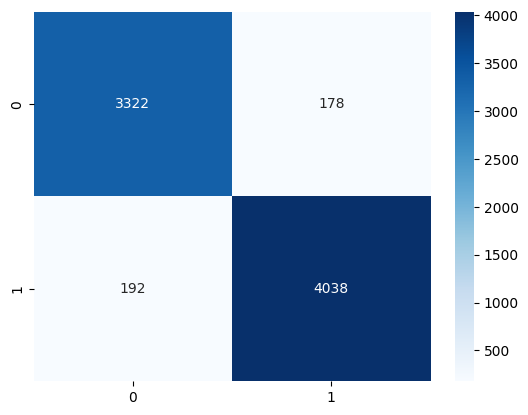

In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Bag of Words
bow_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

bow_pipeline.fit(X_train, y_train)
y_pred_bow = bow_pipeline.predict(X_test)

# Evaluate
print("Bag of Words Model")
print("Accuracy:", accuracy_score(y_test, y_pred_bow))
print(classification_report(y_test, y_pred_bow))
sns.heatmap(confusion_matrix(y_test, y_pred_bow), annot=True, fmt='d', cmap='Blues')
plt.show()

In [25]:
print(X_train.shape)
print(X_test.shape)

(30917,)
(7730,)


## TF-IDF

TF-IDF Model
Accuracy: 0.9366106080206986
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      3500
           1       0.92      0.97      0.94      4230

    accuracy                           0.94      7730
   macro avg       0.94      0.93      0.94      7730
weighted avg       0.94      0.94      0.94      7730



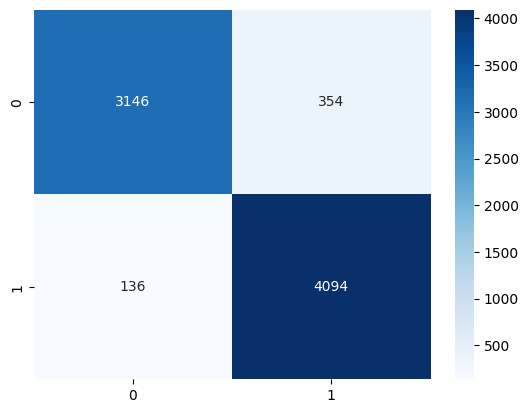

In [29]:
# TF-IDF
tfidf_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

tfidf_pipeline.fit(X_train, y_train)
y_pred_tfidf = tfidf_pipeline.predict(X_test)

# Evaluate
print("TF-IDF Model")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))
sns.heatmap(confusion_matrix(y_test, y_pred_tfidf), annot=True, fmt='d', cmap='Blues')
plt.show()


## LST Model

Epoch 1/5
484/484 [==============================] - 139s 280ms/step - loss: 0.1096 - accuracy: 0.9621 - val_loss: 0.0603 - val_accuracy: 0.9803
Epoch 2/5
484/484 [==============================] - 121s 250ms/step - loss: 0.0467 - accuracy: 0.9857 - val_loss: 0.0595 - val_accuracy: 0.9801
Epoch 3/5
484/484 [==============================] - 120s 248ms/step - loss: 0.0309 - accuracy: 0.9900 - val_loss: 0.0654 - val_accuracy: 0.9788
Epoch 4/5
484/484 [==============================] - 118s 243ms/step - loss: 0.0214 - accuracy: 0.9936 - val_loss: 0.0791 - val_accuracy: 0.9797
Epoch 5/5
242/242 [==============================] - 7s 27ms/step - loss: 0.0894 - accuracy: 0.9801
LSTM Model
Test Accuracy: 0.9800776243209839


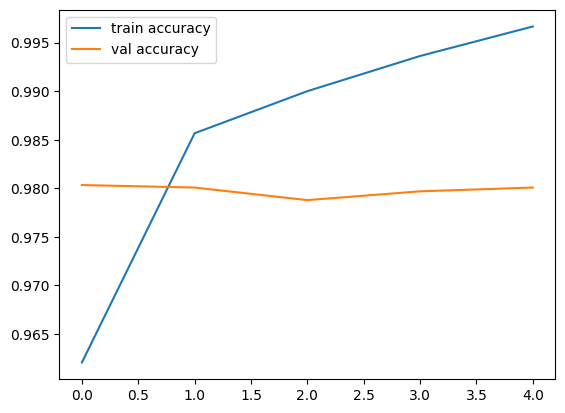

In [70]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.utils import to_categorical

# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

maxlen = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

# Convert labels to categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=maxlen))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(2, activation='softmax'))

optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_pad, y_train_cat, epochs=5, batch_size=128, validation_data=(X_test_pad, y_test_cat))

# Evaluate
score = model.evaluate(X_test_pad, y_test_cat)
print("LSTM Model")
print("Test Accuracy:", score[1])

# Plot training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()


## Transformer Model

In [26]:
!pip install --quiet transformers

In [ ]:
! pip install evaluate

In [1]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [26]:
News['text'][0]

'donald trump wish american happy new year leave instead give shout enemy hater dishonest fake news medium former reality show star one job country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake news medium happy healthy new year president angry pant tweeted great year america country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake news medium happy healthy new year great year america donald j trump realdonaldtrump december trump tweet went welll expect kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizen happy new year bishop talbert swan talbertswan december one like calvin calvinstowell december impeachment would make great year america also accept regaining control congress miranda yaver mirandayaver december hear talk include many people hate wonder hate alan sandoval alansandoval december us wo

In [27]:
News['text'] = News['text'].apply(preprocess_text)

In [31]:
News['text'][0]

'donald trump wish american happy new year leave instead give shout enemy hater dishonest fake news medium former reality show star one job country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake news medium happy healthy new year president angry pant tweeted great year america country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake news medium happy healthy new year great year america donald j trump realdonaldtrump december trump tweet went welll expect kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizen happy new year bishop talbert swan talbertswan december one like calvin calvinstowell december impeachment would make great year america also accept regaining control congress miranda yaver mirandayaver december hear talk include many people hate wonder hate alan sandoval alansandoval december u wor

In [28]:
df_train, df_test = train_test_split(News, test_size=0.2, random_state=42, stratify=y)

Convert to HuggingFace Dataset

In [ ]:
!pip install --upgrade pyarrow


In [47]:
from datasets import Dataset

train_dataset = Dataset.from_pandas(df_train)
test_dataset = Dataset.from_pandas(df_test)

In [32]:
from transformers import AutoTokenizer

def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

In [51]:
tokenized_train = train_dataset.map(preprocess_function, batched=True)
tokenized_test = test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/30917 [00:00<?, ? examples/s]

Map:   0%|          | 0/7730 [00:00<?, ? examples/s]

In [90]:
from transformers import AutoModelForSequenceClassification

model_name = "distilbert-base-uncased"
model = AutoModelForSequenceClassification.from_pretrained(model_name)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Train the model

In [53]:
from transformers import DataCollatorWithPadding
from transformers import TrainingArguments, Trainer
import evaluate
import numpy as np

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [54]:
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=0.0001,
    per_device_train_batch_size=50,
    per_device_eval_batch_size=50,
    num_train_epochs=5,
    weight_decay=0.01,
    evaluation_strategy = "epoch",
    logging_strategy="epoch"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics

)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [56]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.017900,0.013600,0.997283
2,0.008100,0.008438,0.998577
3,0.004200,0.008543,0.998965
4,0.002500,0.007294,0.998965


Epoch,Training Loss,Validation Loss,Accuracy
1,0.017900,0.013600,0.997283
2,0.008100,0.008438,0.998577
3,0.004200,0.008543,0.998965
4,0.002500,0.007294,0.998965
5,0.001100,0.006203,0.998965


TrainOutput(global_step=3095, training_loss=0.006743801545249434, metrics={'train_runtime': 1853.8242, 'train_samples_per_second': 83.387, 'train_steps_per_second': 1.67, 'total_flos': 2.1914321856822144e+16, 'train_loss': 0.006743801545249434, 'epoch': 5.0})

In [57]:
preds = trainer.predict(tokenized_train)
preds = np.argmax(preds[:3][0],axis=1)
GT = df_train['label'].tolist()
print(classification_report(GT,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13955
           1       1.00      1.00      1.00     16962

    accuracy                           1.00     30917
   macro avg       1.00      1.00      1.00     30917
weighted avg       1.00      1.00      1.00     30917



In [58]:
preds = trainer.predict(tokenized_test)
preds = np.argmax(preds[:3][0],axis=1)
GT = df_test['label'].tolist()
print(classification_report(GT,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3500
           1       1.00      1.00      1.00      4230

    accuracy                           1.00      7730
   macro avg       1.00      1.00      1.00      7730
weighted avg       1.00      1.00      1.00      7730



In [45]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.704600,0.688796,0.547219
2,0.689100,0.688930,0.547219
3,0.688600,0.689328,0.547219
4,0.688700,0.688753,0.547219
5,0.688700,0.688690,0.547219


TrainOutput(global_step=1550, training_loss=0.6919266337733115, metrics={'train_runtime': 1792.0641, 'train_samples_per_second': 86.261, 'train_steps_per_second': 0.865, 'total_flos': 2.0477270497984344e+16, 'train_loss': 0.6919266337733115, 'epoch': 5.0})

In [49]:
preds = trainer.predict(tokenized_train)
preds = np.argmax(preds[:3][0],axis=1)
GT = df_train['label'].tolist()
print(classification_report(GT,preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     13955
           1       0.55      1.00      0.71     16962

    accuracy                           0.55     30917
   macro avg       0.27      0.50      0.35     30917
weighted avg       0.30      0.55      0.39     30917



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
print(preds)

[1 1 1 ... 0 1 0]


In [50]:
preds = trainer.predict(tokenized_test)
preds = np.argmax(preds[:3][0],axis=1)
GT = df_test['label'].tolist()
print(classification_report(GT,preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3500
           1       0.55      1.00      0.71      4230

    accuracy                           0.55      7730
   macro avg       0.27      0.50      0.35      7730
weighted avg       0.30      0.55      0.39      7730



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
tokenized_train

Dataset({
    features: ['text', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
    num_rows: 30917
})

# Evaluation over independent dataset

In [ ]:
from datasets import load_dataset

ds = load_dataset("GonzaloA/fake_news")

In [91]:
# Check if a GPU is available and move the model to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [92]:
def classify_text(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=100)

    # Ensure the model is in evaluation mode
    model.eval()

    # Perform the forward pass
    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits

    # Convert logits to probabilities
    probabilities = torch.nn.functional.softmax(logits, dim=-1)

    # Get the predicted class
    predicted_class = torch.argmax(probabilities, dim=1).item()

    # Define the label mapping
    labels = ['False', 'True']  # Update according to your model's labels

    # Return the predicted label and probabilities
    predicted_label = labels[predicted_class]
    probabilities = probabilities.numpy()

    return predicted_label, probabilities


In [86]:
!pip install --quiet pytorch


  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pytorch)


In [93]:
import torch

user_input = 'Maury is perhaps one of the trashiest shows on television today. It s right in line with the likes of the gutter trash that is Jerry Springer, and the fact that those shows are still on the air with the shit they air really is a sad testament to what Americans find to be entertaining. However, Maury really crossed the line with a Facebook post regarding one of their guest s appearance with a vile, disgusting caption on Tuesday evening.There was a young woman on there doing one of their episodes regarding the paternity of her child. However, on the page, the show posted an image of the woman, who happens to bear a striking resemblance to Senator and presidential candidate Ted Cruz. The caption from the Maury Show page read: The Lie Detector Test determined .that was a LIE! Ted Cruz is just NOT that SEXY! As if that weren t horrible enough, the caption underneath the Imgur upload reads, Ted Cruz in drag on Maury. Here is an image from the official Maury Facebook page:Here is the embed of the post itself:This is beyond despicable. It s bad enough that this show preys on desperate people to keep their trashy show going and their audience of bottom-feeders entertained, but now they publicly mock them as well? This young woman cannot help how she looks or who she resembles. That is not her fault. Shaming someone s looks on social media is something we d expect from the morons who watch this crap on a daily basis, but it is NOT something the official show page should be doing. Then again, what can you expect from a show that rolls in the mud for a living and continues to show the world that there is now low they will not stoop to? This was more than a step too far, though.Maury, you owe this young woman a public apology. A VERY public apology. There s just no excuse for this, no matter the demographics of your audience or what you do on that disgusting show of yours. I suppose it will be too much to ask that you lose viewers over this, because the people who watch your trashy ass show likely aren t educated enough to understand why this is so wrong in the first place. I don t watch, so I can t deprive you of my viewership, but I CAN call you out.Shame on you, Maury Show and everyone associated with this despicable Facebook post. You really showed your true colors here today.Featured image via Facebook'

predicted_label, probabilities = classify_text(user_input)
print(f"Predicted Label: {predicted_label}")
print(f"Probabilities: {probabilities}")


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument index in method wrapper_CUDA__index_select)